<a href="https://colab.research.google.com/github/TienNguyen0712/Data-Science/blob/main/Project/X%C3%A2y_d%E1%BB%B1ng_m%C3%B4_h%C3%ACnh_d%E1%BB%B1_%C4%91o%C3%A1n_Kh%E1%BA%A3_n%C4%83ng_Tr%E1%BA%A7m_C%E1%BA%A3m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **1. Về bảng dữ liệu**

Bảng dữ liệu này chưa các đặc trưng quyết đinh đến việc trầm cảm ở lứa tuổi sinh viên. Ta có thể xây dựng mô hình học máy dự đoán khả năng trầm cảm ở sinh viên

#### **Đặc trưng**
* **Gender** : Giới tính của sinh viên (Female: Nữ, Male: Nam)
* **Age** : Tuổi của sinh viên
* **City**: Thành phố nơi ở của sinh viên
* **Profession**: Nghề nghiệp hiện tại của sinh viên
* **Academic Pressure**: Mức độ áp lực mà sinh viên phải trải qua trong học tập
* **Work Pressure**: Mức độ ấp lực mà sinh viên phải trải qua trong làm việc
* **CGPA**: Điểm số thước đo thành tích của sinh viên
* **Study Satisfaction**: Mức độ hài lòng của sinh viên trong việc học tập
* **Job Satisfaction**: Mức độ hài lòng của sinh viên trong công việc
* **Sleep Duration**: Thời gian dành cho việc ngủ
* **Dietary Habits**: Thói quen ăn uống
* **Degree**: Bằng cấp
* **Have you ever had suicidal thoughts ?**: Đã bao giờ có ý định xấu hay chưa?
* **Work/Study Hours**: Thời gian làm việc và học tập
* **Financial Stress**: Áp lực về kinh tế
* **Family History of Mental Illness**: Tiền xử gia đinh mấc bệnh về tâm lý
* **Depression**: Trầm cảm hay không (1: Yes, 0: No)

Nguồn [Student Depression Dataset](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data) trên Kaggle


#### **2. Phân tích dữ liệu (EDA)**

Ta sẽ đi sâu vào việc phân tích các đặc trưng sẽ ảnh hưởng như thế nào đến biến mục tiêu.
Các bước chính được sử dụng trong phần này:
* Khai báo dữ liệu và khái quát dữ liệu:
  * Khai báo dữ liệu bằng thư viện pandas
  * Có bao nhiêu cột bao nhiêu hàng ?
  * Xuất ra 5 dữ liệu đầu tiên để xem khái quát về dữ liệu cũng như các thông tin của từng cột
* Làm sạch dữ liệu và tiền xử lý:
  * Kiểm tra dữ liệu bị thiếu (Missing Data):
    * Dữ liệu bị thiếu nếu không cần thiết thì có thể loại bỏ còn nếu cần thiết thì tìm các cách để thay thế (*mean* hoặc *giá trị xuất hiện nhiều nhất*)
  * Kiểm tra Dữ liệu bị trùng (Dupplicated)
    * Truy vấn đền vị trí mà dữ liệu bị trùng.
    * Nếu cần thiết thì có thể giữ lại còn không thì loại bỏ
* Khám phá kiểu dữ liệu trong bảng tính
    * Cột nào mang kiểu dữ liệu: SỐ (Numerical)
    * Cột nào mang kiểu dữ liệu: PHÂN LOẠI (Categoriacl)
    * Nêu chưa chính xác kiểu dữ liệu thì có thể chuyển về kiểu dữ liệu đúng
    * Dùng các thống kê tóm tắt để đánh giá các cột
      * **Cột dữ liệu số**: Dùng *mean*, *std*, *max*, ... để đánh giá, dùng biểu đồ histogram để đánh giá phân phối dùng boxplot để tìm kiếm giá trị bị nhiễu (outlier)
      * **Cột dữ liệu phân loại**: **unique**, **fequen**, ... nhằm đánh giá cột Cate có bao nhiêu phân loại khác nhau, phân loại nào nhiều nhất ở mỗi cột. Dùng Barplot để so sánh các phân loại có trong mỗi cột cũng như phân phối của chúng có trong bảng dữ liệu

In [ ]:
# Import thư viện
import pandas as pd
import numpy as np

# Import thư viện để trực quan hoá
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loại bỏ lỗi
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import dữ liệu 'student_depression_dataset.csv' bằng pandas vào colab
df = pd.read_csv('student_depression_dataset.csv')
df = df.drop(columns='id')
# Xuất ra số hàng và số cột của bảng dữ liệu
df.shape

(27901, 17)

In [ ]:
# Xuất ra 5 dòng đầu của bảng dữ liệu
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

#### **Missing Values**
- Trong bảng dữ liệu trên không có dữ liệu bị thiếu

#### **Kiểu dữ liệu trong mỗi cột và Logic**
Trong bảng đều chứa các cột có hai kiểu dữ liệu đặc trưng (Numerical) và (Categorical):
- **Cột Numerical**: Biểu diễn cả kiểu dữ liệu số nguyên (`int64`) và kiểu dữ liệu số thực (`float64`). Kiểu dữ liệu số nguyên ở cột Depression chúng thể hiện rằng có bị trầm cảm hay không còn lại kiểu dữ liệu số thực là Tuổi, Áp lực việc học, Áp lực công việc, CGPA, Mức độ hài lòng việc học, Mức độ hài lòng trong công việc
- **Cột Categorical**: với tên biểu hiện trong bảng là `object` sử dụng để biểu diễn các đặc trưng phân loại như Giới tính, Thành phố, Nghề nghiệp, Thói quen ăn uống, Thời gian ngủ, Nghành nghề tốt nghiệp, Có ý định muốn làm gì xấu hay không ?,  Áp lực tài chính, Tiền xử bị bệnh tâm lý của gia đình

#### **Cột dữ liệu số và cột dữ liệu phân loại**
- **Cột dữ liệu số (Numerical)**: 8 cột (7 cột số thực và 1 cột số nguyên)
  * **Integers (int64)**: Có một cột mang dữ liệu là số thực chính là cột `Trầm cảm (Depression)`
  * **Floating-point (float64)**: Có 7 cột còn lại bao gồm Tuổi, Áp lực việc học, Áp lực công việc, CGPA, Mức độ hài lòng với công việc, Mức độ hài lòng trong việc học
- **Cột dữ liệu phân loại (Categorical)**: 10 dữ liệu phân loại biểu diễn Giới tinh, Thành phố nơi sinh viên sinh sống, Nghề nghiệp, Thói quen ăn uống, Thời gian ngủ, Ngành nghề tốt nghiệp, Có ý định tự từ hay không, Áp lực tàic hính, Tiền xử gia đình bị mắc bệnh tâm lý

Trong bảng dữ liệu biểu diễn các dữ liệu số thực bởi lẽ trải qua một quá trình tính toán, khảo sát xử lý. Chỉ có duy nhất một cột chứa dữ liệu só nguyên chính là để biểu diễn việc bạn có bị trầm cảm hay không (1: Có và 0: Không)

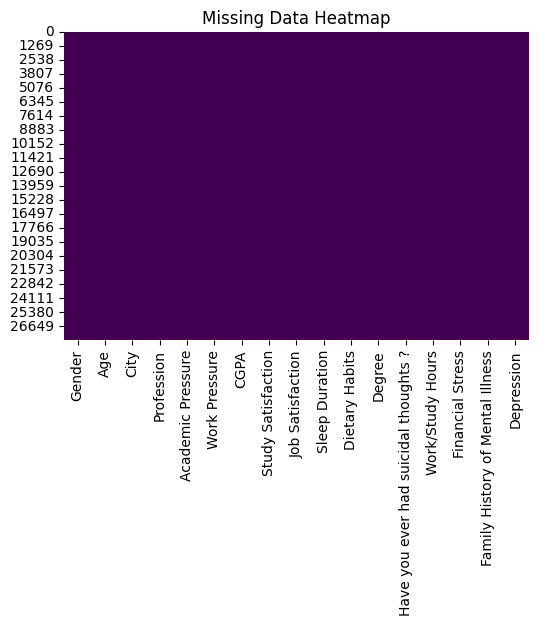

Missing: 
 Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
# Tính toán dữ liệu bị thiếu
missing_data = df.isnull().sum()

# Trực quan hoá dữ liệu bị thiếu

plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Xuất dữ liệu bị thiếu
print("Missing: \n" ,missing_data)

In [ ]:
# Tìm xem cột nào chứa dữ liệu bị trùng lặp
duplicated_columns = df.columns[df.T.duplicated()]

# In ra màn hình nếu như xuất hiện cột dữ liệu bị trùng
if not duplicated_columns.empty:
    print("Các cột bị trùng lặp:")
    for col in duplicated_columns:
        print(col)
else:
    print("Không có cột nào bị trùng lặp.")

Không có cột nào bị trùng lặp.


In [ ]:
df = df.drop_duplicates().reset_index(drop=True)
print(df.shape)

(27901, 17)


In [ ]:
df.describe() # Mô tả dữ liệu số (Numerical)

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
df.describe(include='object') # Mô tả dữ liệu phận loại (Categorical)

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,6,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,5.0,No
freq,15547,1570,27870,8310,10317,6080,17656,6715,14398


In [ ]:
# Chọn cột số (numerical)
numeric_df = df.select_dtypes(include=['int64', 'float64']).columns
print("numeric_data", numeric_df)
# Chọn cột phân loại (categorical)
categorical_df = df.select_dtypes(include=['object']).columns
print("categorical", categorical_df)


numeric_data Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Depression'],
      dtype='object')
categorical Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')


In [ ]:
for col in categorical_df:
  unique_values =  df[col].unique()

  # In ra các thành phần khác nhau trong từng cột
  print(f"\nCác thành phần khác nhau trong cột '{col}':")
  print(unique_values)

  # In ra các thành phàn đếm các giá trị nếu cần thiết
  # print(df[col].value_counts())


Các thành phần khác nhau trong cột 'Gender':
['Male' 'Female']

Các thành phần khác nhau trong cột 'City':
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']

Các thành phần khác nhau trong cột 'Profession':
['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

Các thành phần khác nhau trong cột 'Sleep Duration':
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 ho

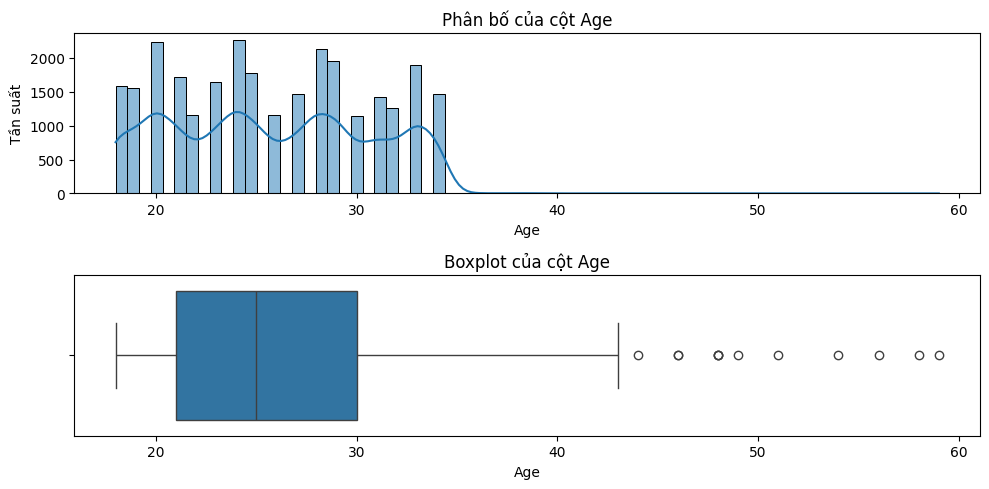

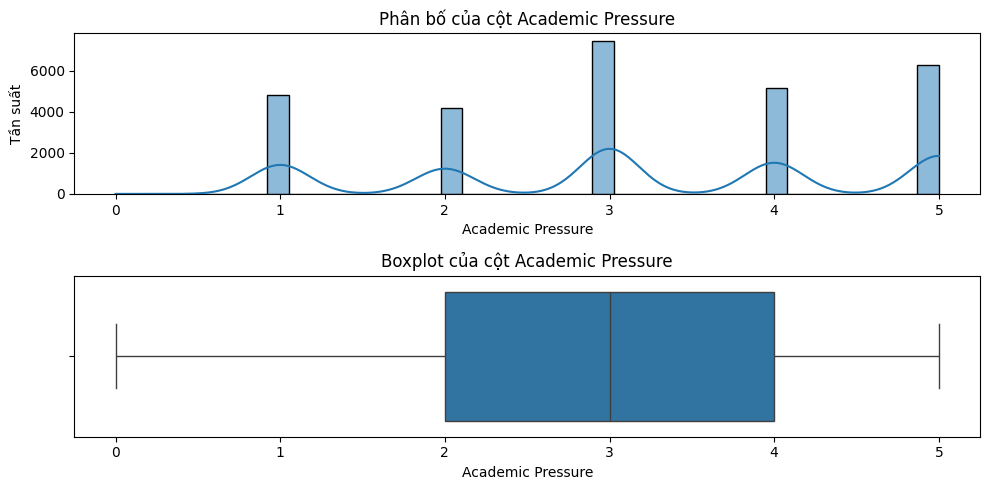

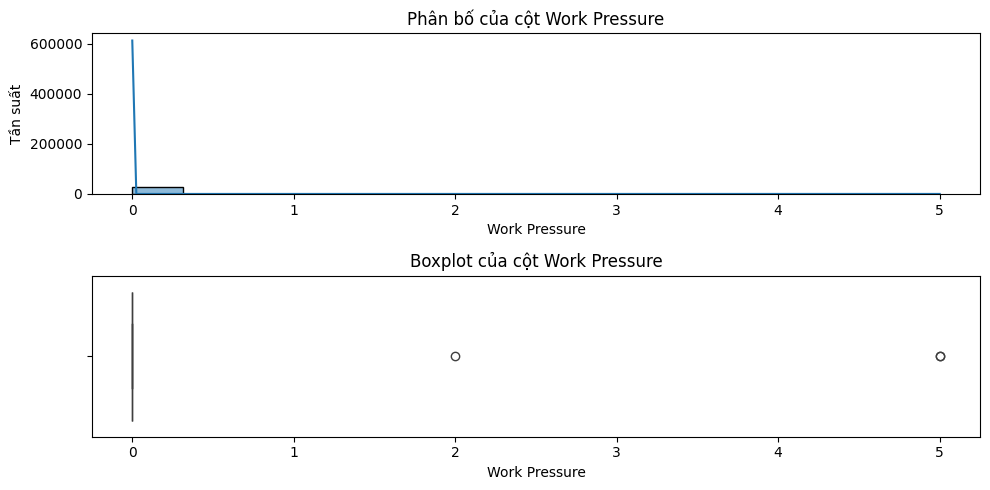

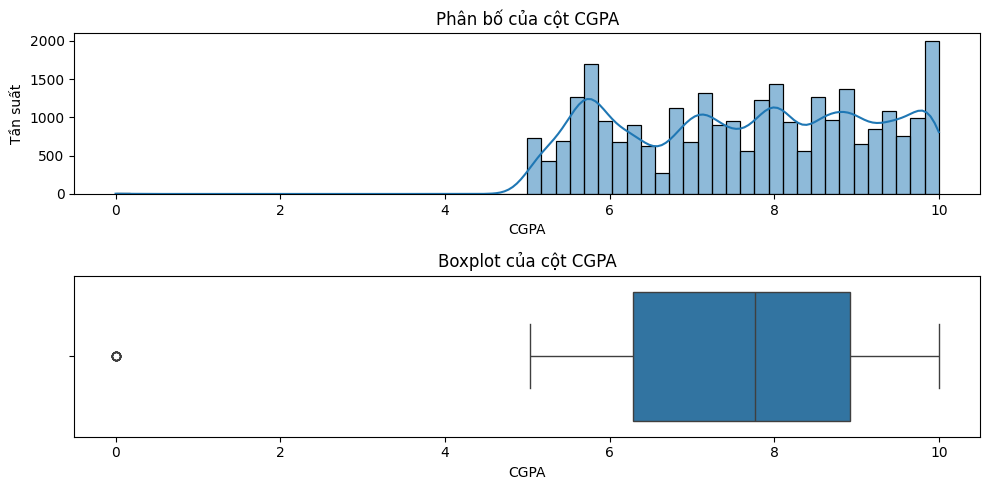

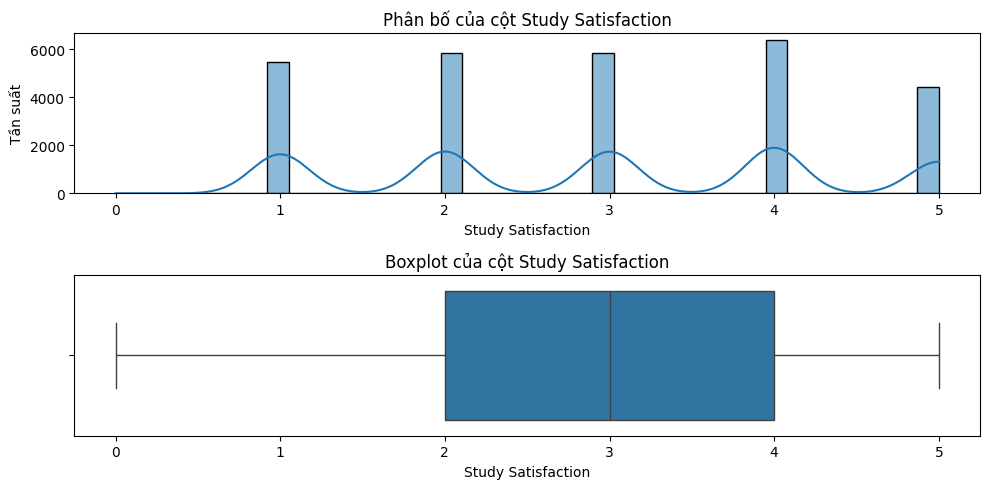

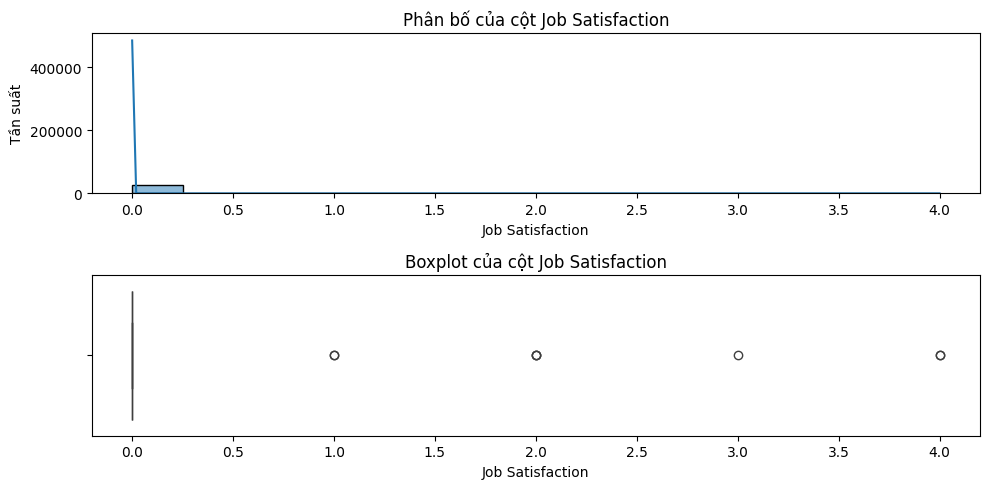

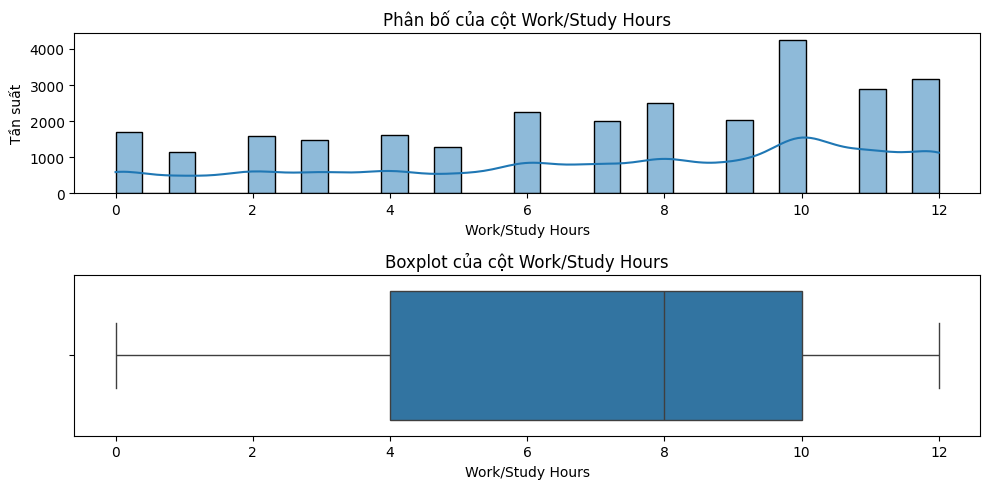

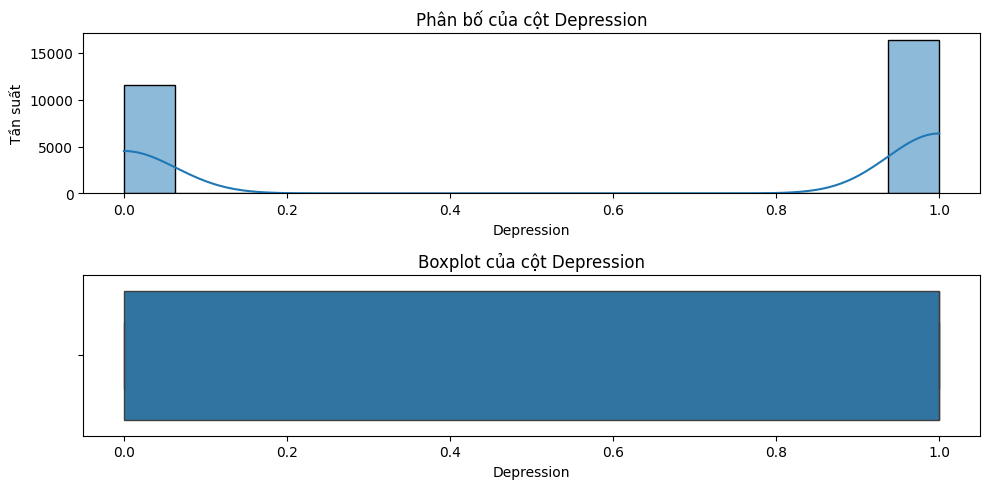

In [ ]:
for col in numeric_df:
  fig, axes = plt.subplots(2, 1, figsize=(10, 5)) # 2 hàng và 1 cột

  # Hiện biểu đồ phân tán (Biểu đồ trên)
  sns.histplot(data = df, x = col, kde = True, ax = axes[0])
  axes[0].set_title(f'Phân bố của cột {col}')
  axes[0].set_xlabel(col)
  axes[0].set_ylabel('Tần suất')

  # Hiện biểu đồ boxplot (Biểu đồ dưới)
  sns.boxplot(data = df, x = col, ax = axes[1])
  axes[1].set_title(f'Boxplot của cột {col}')
  axes[1].set_xlabel(col)

  # Điều chỉnh layout
  plt.tight_layout()
  plt.show()

In [ ]:
df['Profession'] = df['Profession'].apply(lambda x: x if x in ['Student'] else 'Others')
df['City'] = df['City'].apply(lambda x: x if x  in ['Kalyan', 'Srinagar', 'Hyderabad', 'Vasai-Virar', 'Lucknow', 'Thane', 'Ludhiana', 'Agra', 'Surat', 'Kolkata', 'Jaipur', 'Patna', 'Visakhapatnam', 'Pune', 'Ahmedabad', 'Bhopal', 'Chennai', 'Meerut', 'Rajkot', 'Delhi', 'Bangalore', 'Ghaziabad', 'Mumbai', 'Vadodara', 'Varanasi', 'Nagpur', 'Indore', 'Kanpur', 'Nashik', 'Faridabad'] else 'Orthers')


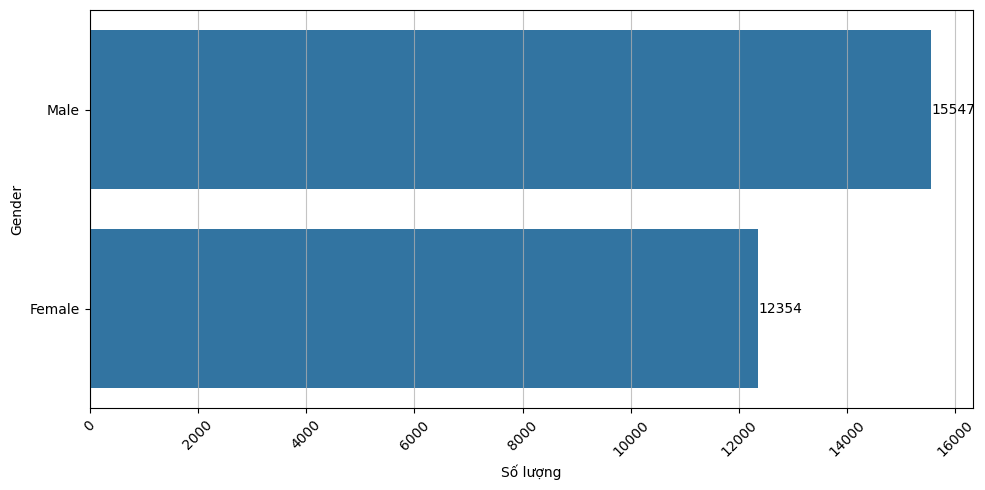

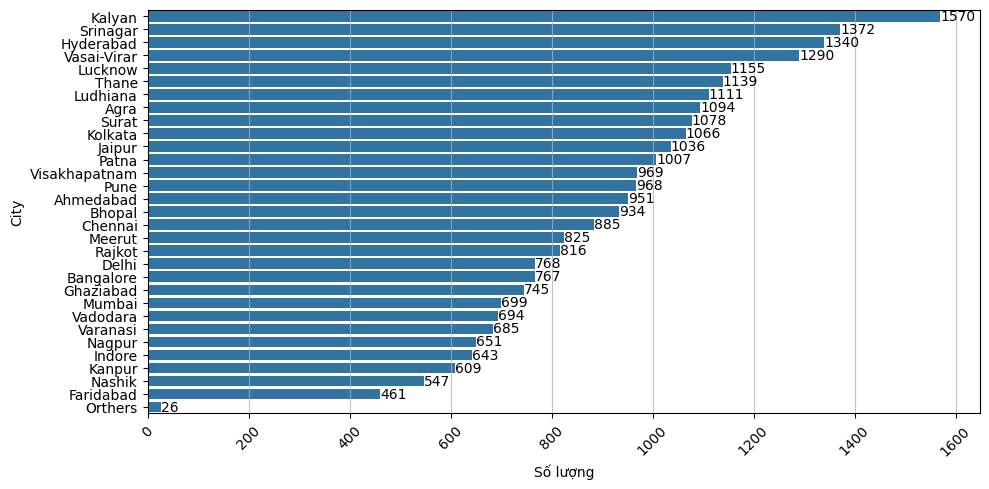

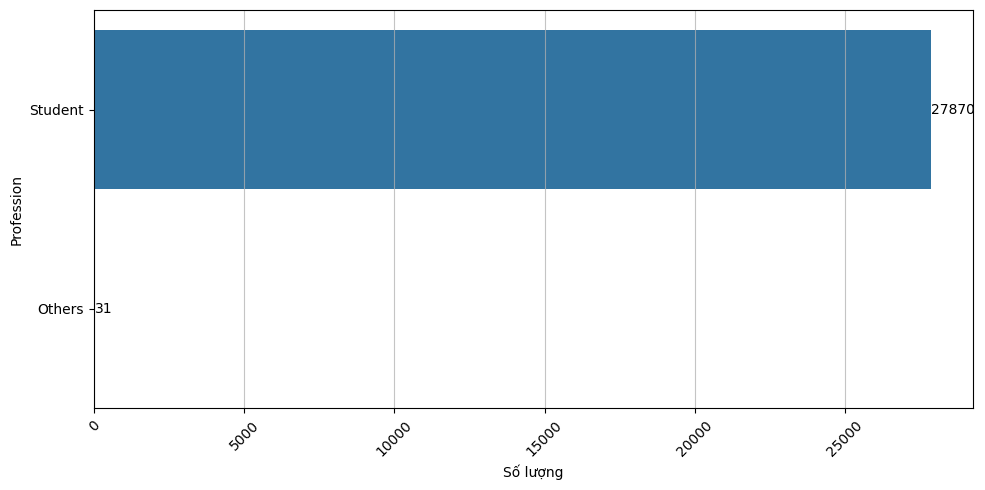

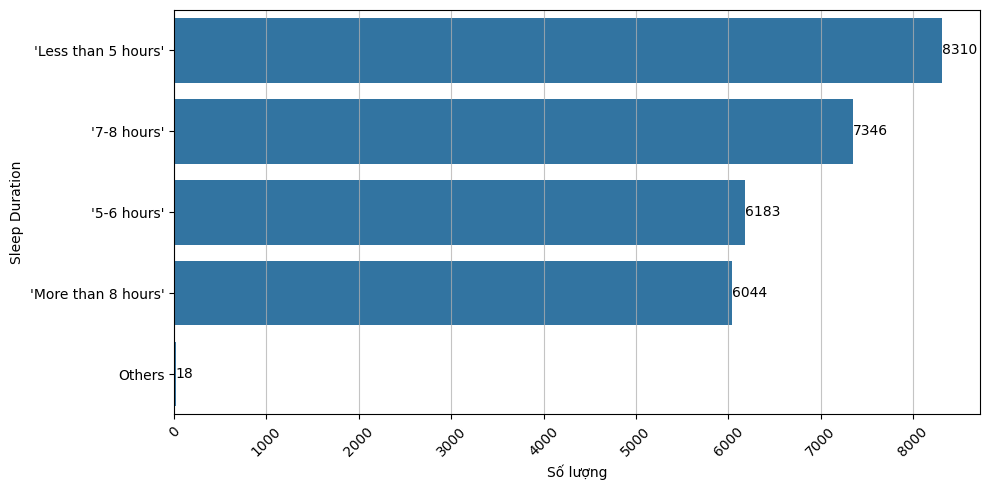

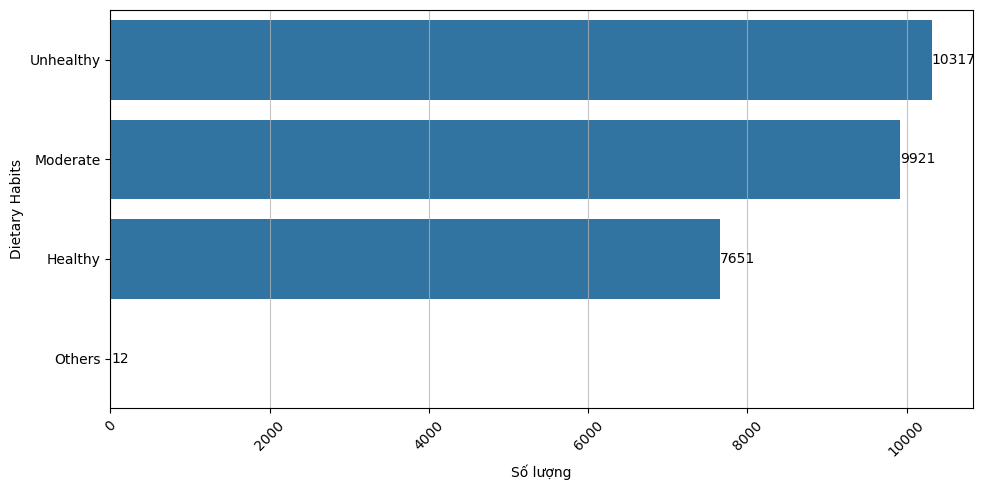

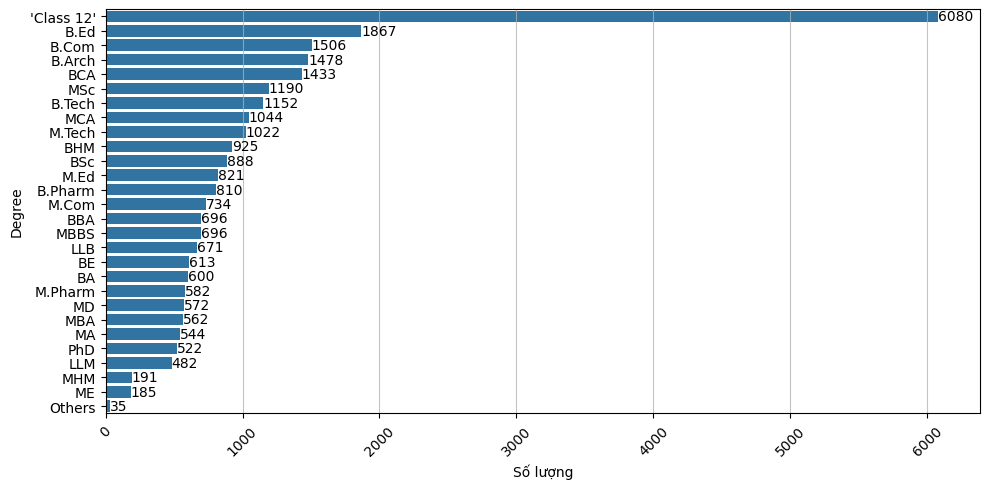

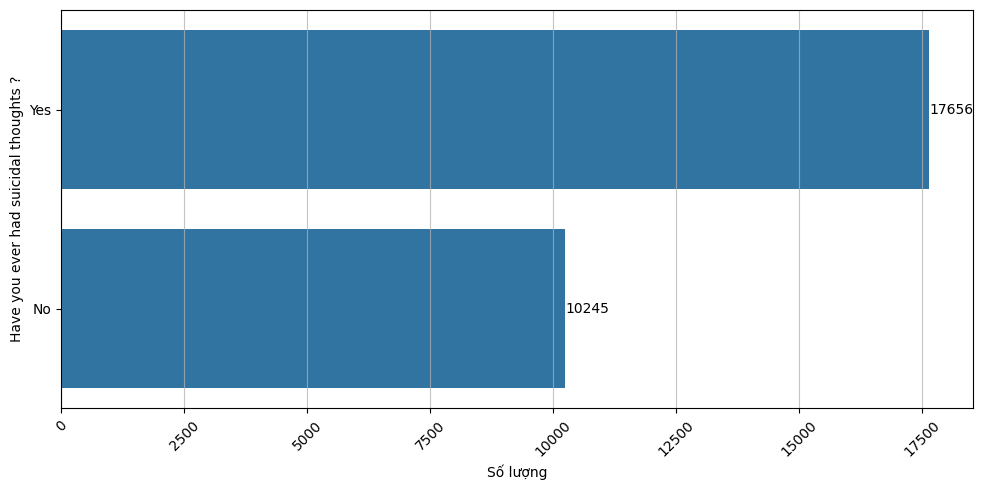

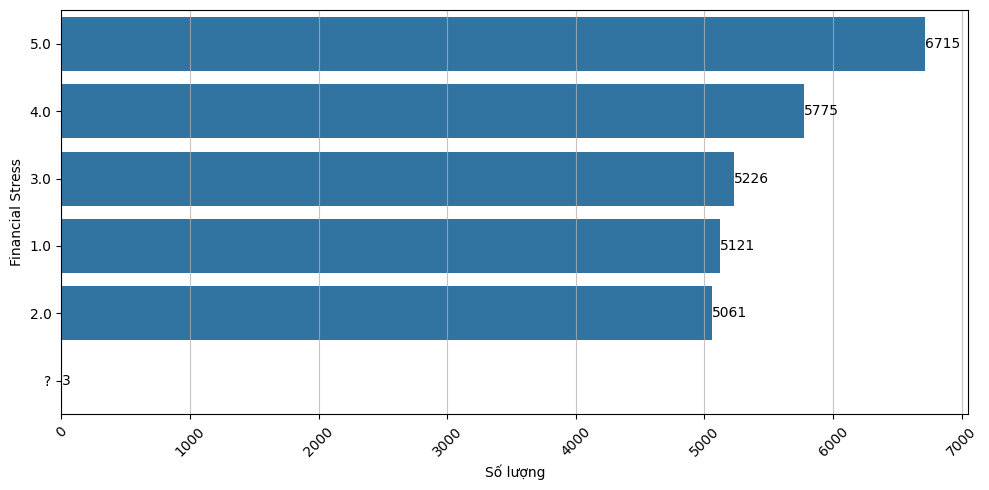

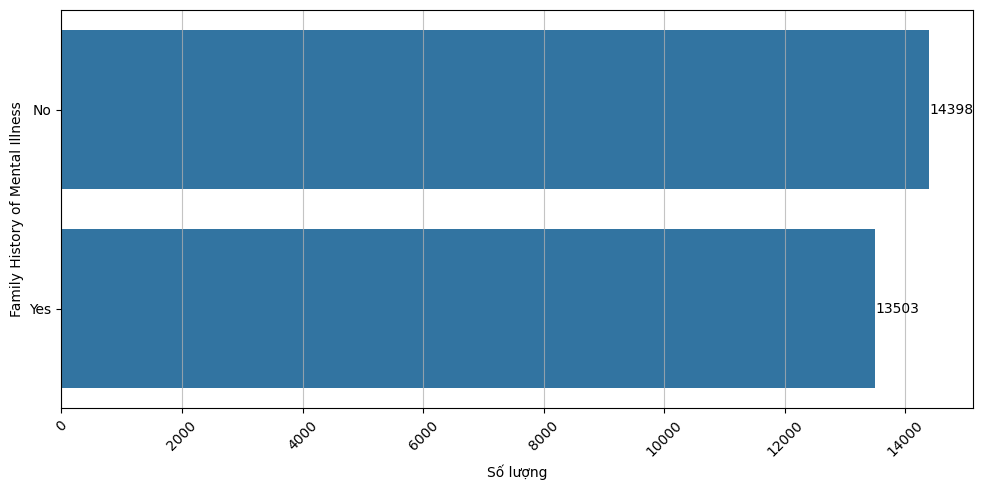

In [ ]:
for col in categorical_df:
  plt.figure(figsize=(10, 5))

  # Đếm giá trị cho từng thuộc tính
  value_counts = df[col].value_counts()

  # Tạo biểu đồ bar plot
  ax = sns.barplot(x = value_counts.values, y = value_counts.index)

  # Điều chỉnh biểu đồ tên cột y và tên cột x
  plt.ylabel(col)
  plt.xlabel("Số lượng")
  plt.xticks(rotation=45)
  plt.grid(axis = 'x', alpha = 0.75)

  # Thêm số lượng
  for index, value in enumerate(value_counts.values):
    plt.text(value, index, f'{value}', va = 'center')

  # Biểu diễn biểu đồ
  plt.tight_layout()
  plt.show()

#### **3. Lựa chọn các đặc trưng quan trọng để thực hiện bước xử huấn luyện mô hình**

- Phân tích các mối quan hệ
  * Tính toán các hệ số quan hệ cho các đặc trưng dữ liệu số (Numerical)
  * Trực quan chúng trên biểu đồ nhiệt
  * Bước này nhằm:
    * Xác đinh đặc trưng có mối quan hệ cao
    * Hiểu về xem đặc trưng nào là quan trọng nhất mang giá trị âm (nghịch) hay dương (thuận) hay mối quan hệ giứa các biến với nhau xảy ra như thế nào
- Lựa chọn biến mục tiêu để dự đoán cũng như loại bỏ biến mục tiêu có trong bảng dữ liệu:
  * Tạo một danh sách lấy các đặc trưng chính
  * Loại bỏ biến mục tiêu (biến cần dự đoán) từ bảng dữ liệu
  * Tạo một danh sách cuối cùng để xây dựng mô hình



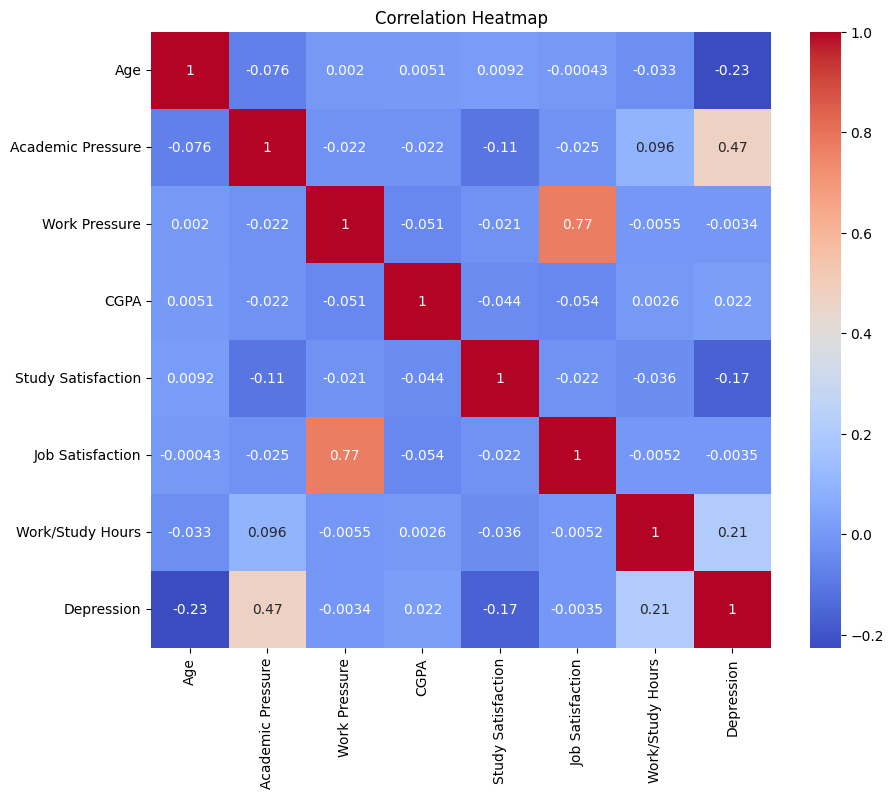

In [ ]:
# Tính toán mối quan hệ
corr = df[numeric_df].corr()

# Vẽ biểu đổ nhiệt
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
drop_col = df.drop(columns=['Depression'], axis = 1)
select_col = df.iloc[:, -1]

print("Cột lựa chọn làm các biến để dư đoán: \n", [col for col in drop_col.columns])
print(f"Cột làm biến để dư đoán: \n ['Depression']" )

Cột lựa chọn làm các biến để dư đoán: 
 ['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']
Cột làm biến để dư đoán: 
 ['Depression']


#### **4. Lựa chọn mô hình và đánh giá mô hình thuật toán**

- Lựa chọn mô hình
  * Chọn các mô hình chính (Logistic Regression, Decision Tree, Naive Bayes, ...) cho việc đánh giá phân loại dự đoán xem đặc trưng nào có thể ảnh hưởng đến việc dự đoán khả năng trầm cảm
- Đánh giá hiệu suất hoạt động của mô hình
  * Đánh giá hiệu suất của mô hình (accuracy, precision, recall, F1-score, ...)
  * Sử dụng biểu đồ bar để đánhh giá hiệu suất của các mô hình phân loại
  * Chia bảng dữ liệu lớn thành nhiều bảng dữ liệu nhỏ khác nhau
- Tối ưu hoá hiệu suát mô hình
  * Lựa chọn thuật toán có tỉ lệ đánh giá cao nhất
  * Sử dụng các thuật toán tối ưu làm thay đổi các hệ số trong thuật toán
  * Xuất ra bảng giá trị đánh giá hiệu suất của thuật toán
- Lựa chọn đặc trưng quan trọng nhất trong mô hình
  * Tính toán các hệ số tương quan
  * Dùng biểu đồ so sánh để xem thứ tự quan trọng của các đặc trưng

In [ ]:
# Lựa chọn mô hình

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Đánh giá mô hình
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

# Thay đổi dữ liệu phân loại thành dữ liệu số, thay đổi dữ liệu số thành chung một scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Hàm thay đổi
def convert(data):
  le = LabelEncoder()
  ss = StandardScaler()
  cate_col = data.select_dtypes(include=['object']).columns
  num_col = data.select_dtypes(include=['int64', 'float64']).columns
  for col in cate_col:
    data[col] = LabelEncoder().fit_transform(data[col])
  for co in num_col:
    data[co] = ss.fit_transform(data[[co]])
  return data

In [ ]:
# Ép kiểu cột 'Depression' về phân loại
df['Depression'] = df['Depression'].astype('object')

# Chuyển các dữ liệu phân loại thành dữ liệu số và đưa dữ liệu số về chun một scale
convert(df)
select_columns = df.iloc[:, :-1]
target_column = df.iloc[:, -1]

# Tách dữ liệu thành dữ liệu train và test
x_train, x_test, y_train, y_test = train_test_split(select_columns, target_column, test_size=0.2, random_state=42)
print("Số hàng và cột của các tập train, test: ", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Số hàng và cột của các tập train, test:  (22320, 16) (5581, 16) (22320,) (5581,)


In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear')))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))


model_list = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'SVM']
accuracy_list = []
auc_list = []
cm_list = []

for name, model in models:
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = np.trapz(tpr, fpr)
  auc_list.append(auc)
  cm = confusion_matrix(y_test, y_pred)
  cm_list.append(cm)


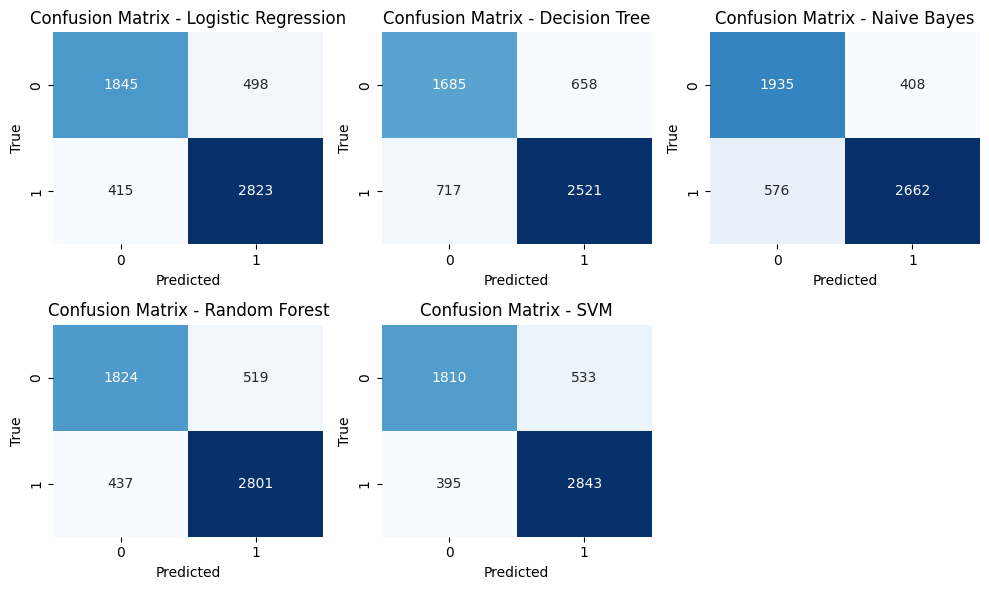

In [ ]:
# Biểu đồ Confusion matrix
fig = plt.figure(figsize=(10, 6))
for i, cm in enumerate(cm_list):
  ax = fig.add_subplot(2, 3, i+1)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  ax.set_title(f'Confusion Matrix - {model_list[i]}')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('True')
plt.tight_layout()
plt.show()

In [ ]:
re_df = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list, 'AUC': auc_list})
re_df

,Model,Accuracy,AUC
0,Logistic Regression,0.836409,0.829643
1,Decision Tree,0.753628,0.748865
2,Naive Bayes,0.823688,0.823988
3,Random Forest,0.828705,0.821765
4,SVM,0.833722,0.825262


In [ ]:
from sklearn.model_selection import GridSearchCV
log_reg_grid = {
    "C": np.logspace(-3, 3, 30),
    "solver": ["liblinear"]
}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gs_log_reg.fit(x_train, y_train)

# Huấn luyện modela
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 1.61026203e-03, 2.59294380e-03, 4.17531894e-03,
       6.72335754e-03, 1.08263673e-02, 1.74332882e-02, 2.80721620e-02,
       4.52035366e-02, 7.27895384e-02, 1.17210230e-01, 1.88739182e-01,
       3.03919538e-01, 4.89390092e-01, 7.88046282e-01, 1.26896100e+00,
       2.04335972e+00, 3.29034456e+00, 5.29831691e+00, 8.53167852e+00,
       1.37382380e+01, 2.21221629e+01, 3.56224789e+01, 5.73615251e+01,
       9.23670857e+01, 1.48735211e+02, 2.39502662e+02, 3.85662042e+02,
       6.21016942e+02, 1.00000000e+03]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [ ]:
# Kiểm tra hệ số tốt nhất
gs_log_reg.best_params_

# Xây dựng mô hình dự đoán mới với hệ số tối ưu nhất
clf = LogisticRegression(C=0.18873918221350977, solver='liblinear')
clf.fit(x_train, y_train)

# Tìm đặc trưng quan trọng nhất
clf.coef_
df_coef = dict(zip(df.columns, list(clf.coef_[0])))
df_coef

{'Gender': np.float64(0.0031048284033268693),
 'Age': np.float64(-0.5336144059445693),
 'City': np.float64(-0.03420159707948256),
 'Profession': np.float64(-0.06675930594879513),
 'Academic Pressure': np.float64(1.1655538396520968),
 'Work Pressure': np.float64(0.0056208710427273385),
 'CGPA': np.float64(0.09472555600624878),
 'Study Satisfaction': np.float64(-0.3347126743796214),
 'Job Satisfaction': np.float64(0.007705210525334163),
 'Sleep Duration': np.float64(-0.043298726471160814),
 'Dietary Habits': np.float64(0.4279986287241333),
 'Degree': np.float64(0.021562243080769795),
 'Have you ever had suicidal thoughts ?': np.float64(1.2297244062178951),
 'Work/Study Hours': np.float64(0.4328677991457778),
 'Financial Stress': np.float64(0.7948863428788193),
 'Family History of Mental Illness': np.float64(0.1417490536572272)}

<Figure size 1000x600 with 0 Axes>

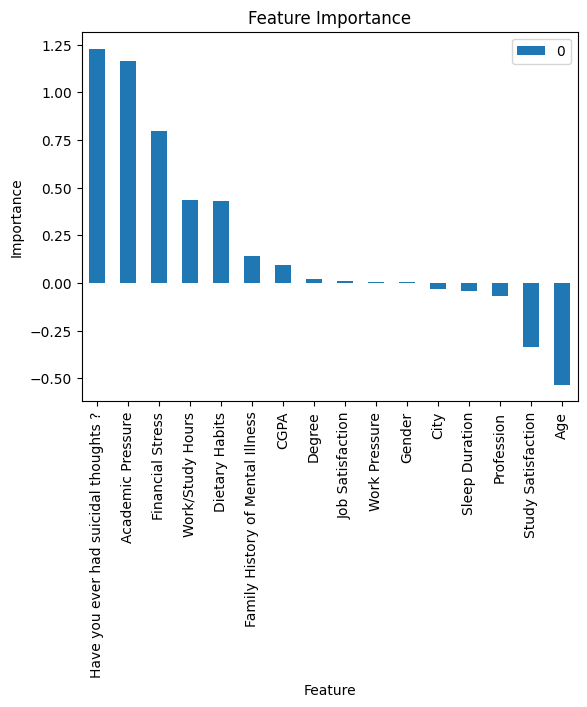

In [ ]:
importance = pd.DataFrame(df_coef, index = [0])

# Biểu đồ sô sánh đặc trưng quan trọng
plt.figure(figsize=(10, 6))
importance.T.sort_values(by=0, ascending=False).plot(kind = 'bar')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [ ]:
# Xây dựng hàm dự đoán
def predict_drepress(student):
  x = np.zeros(len(df.columns[:-1]))
  for i in range(len(df.columns[:-1])):
    x[i] = student[i]
  return clf.predict([x])[0]

# student1 = [1, 12, 3, 2, 4, 5, 7, 8, 9, 12, 15, 20, 19, 15, 18, 10]
# predict_drepress(student1)

#### **5. Tổng kết**
- Qua bài này chúng ta đã có thể tìm hiểu về các tác nhân gây ảnh hưởng đến với mức độ trầm cảm ở một sinh viên. Tuy nhiên để xác định một cách rõ ràng thì ta cần phải xem xét, nhận định nhiều thứ

- Ngoài ra cũng đã xây dựng một mô hình dự đoán đơn giản từ một dữ liệu đầu vào dựa theo thuật toán phân loại

- Nhưng dữ liệu trong bảng này không trực quan cũng như chưa thể cân bằng, dữ liệu trong bảng có thể bị thiên vị, chưa thể loại bỏ một số cột có dữ liệu bị nhiễu. Đòi hỏi cần có sự xử lý để có thể đưa ra một nhận xét đúng đắn nhất